In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/fruit-and-vegetable-prices/Fruit Prices 2020.csv')

In [3]:
df.head()

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Apples,Fresh,1.5193,per pound,0.90,0.2425,pounds,0.4094
1,"Apples, applesauce",Canned,1.0660,per pound,1.00,0.5401,pounds,0.5758
2,"Apples, ready-to-drink",Juice,0.7804,per pint,1.00,8.0000,fluid ounces,0.3902
3,"Apples, frozen concentrate",Juice,0.5853,per pint,1.00,8.0000,fluid ounces,0.2926
4,Apricots,Fresh,2.9665,per pound,0.93,0.3638,pounds,1.1603


In [4]:
df.shape

(62, 8)

In [5]:
df.isna().sum()

Fruit                 0
Form                  0
RetailPrice           0
RetailPriceUnit       0
Yield                 0
CupEquivalentSize     0
CupEquivalentUnit     0
CupEquivalentPrice    0
dtype: int64

In [6]:
def separate(x):
    x = x.split()[0]
    rule = list(', ')
    while x[-1] in rule:
        x = x[:-1]
    
    return x

In [7]:
df['Processed'] = df['Fruit'].apply(separate)

<div style='font-size:120%;
            padding:10px;
            margin:10px;
            background-color:#F2FFEB;
            font-family:"Kimberley", sans-serif;'>
    <h1 style='text-align:center;'>
        🥝🍎 The most popular fruits 🍌🍉
    </h1>
</div>

In [8]:
df['Processed'].unique()

array(['Apples', 'Apricots', 'Bananas', 'Berries', 'Blackberries',
       'Blueberries', 'Cantaloupe', 'Cherries', 'Clementines',
       'Cranberries', 'Dates', 'Figs', 'Fruit', 'Grapefruit', 'Grapes',
       'Honeydew', 'Kiwi', 'Mangoes', 'Nectarines', 'Oranges', 'Papaya',
       'Peaches', 'Pears', 'Pineapple', 'Plum', 'Pomegranate',
       'Raspberries', 'Strawberries', 'Watermelon'], dtype=object)

In [9]:
df['Processed'].value_counts()

Pineapple       6
Apples          4
Apricots        4
Peaches         4
Grapes          4
Plum            3
Pears           3
Oranges         3
Blueberries     2
Blackberries    2
Strawberries    2
Raspberries     2
Pomegranate     2
Papaya          2
Mangoes         2
Grapefruit      2
Fruit           2
Cherries        2
Honeydew        1
Kiwi            1
Cantaloupe      1
Nectarines      1
Berries         1
Figs            1
Bananas         1
Dates           1
Cranberries     1
Clementines     1
Watermelon      1
Name: Processed, dtype: int64

<div style='font-size:120%;
            padding:10px;
            margin:10px;
            background-color:#F2FFEB;
            font-family:"Kimberley", sans-serif;'>
    <h1 style='text-align:center;'>
        🥝🍎 The most popular form of fruit conservation 🍌🍉
    </h1>
</div>

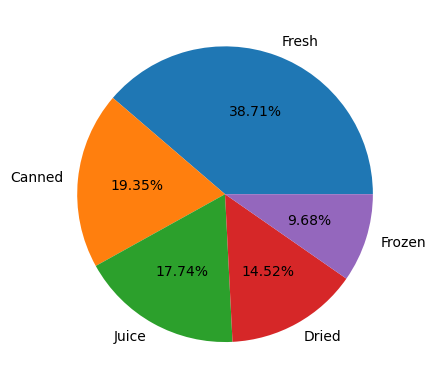

In [10]:
plt.pie(df['Form'].value_counts(),
       labels=df['Form'].value_counts().index,
       autopct='%0.2f%%')

plt.show()

In [11]:
def plots(df, x, y):
    grouped = df.groupby(y)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
    sns.histplot(df, x=x, hue=y, ax=axes[0], kde=True)
    axes[0].set_title("{} data distribution by {}".format(x, y))
    sns.barplot(x=grouped[x].mean().index,
               y=grouped[x].mean(),
               ax=axes[1])
    
    for container in axes[1].containers:
        axes[1].bar_label(container, size=10, color='black')
        
    axes[1].set_title("{} mean values grouped by {}".format(x, y))
    sns.boxplot(x=df[y], y=df[x], ax=axes[2])
    axes[2].set_title("{} boxplots grouped by {}".format(x, y))
    
    plt.tight_layout()
    plt.show()

In [12]:
numerical = ['RetailPrice', 'CupEquivalentPrice', 'CupEquivalentSize', 'Yield']

<div style='font-size:120%;
            padding:10px;
            margin:10px;
            background-color:#F2FFEB;
            font-family:"Kimberley", sans-serif;'>
    <h1 style='text-align:center;'>
        General overview of numerical data
    </h1>
</div>

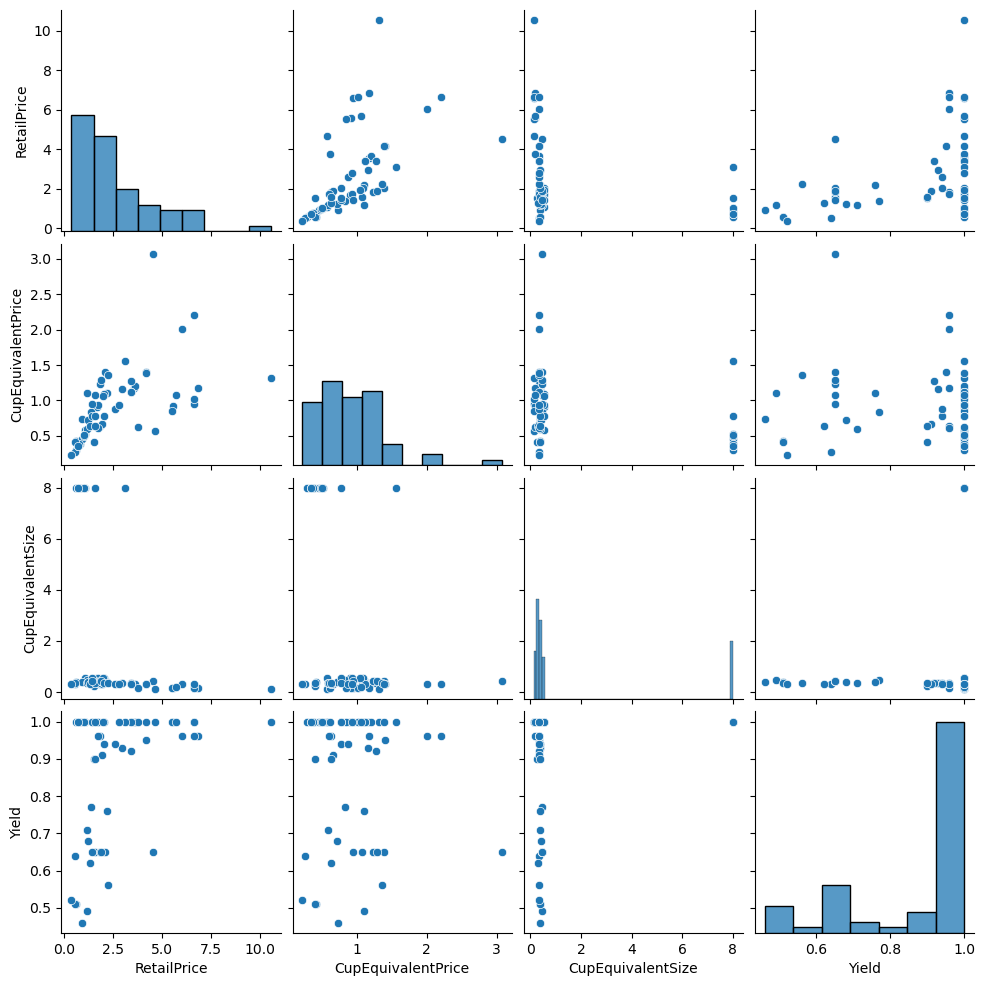

In [13]:
sns.pairplot(df, vars=numerical)

<div style='font-size:120%;
            margin:15px;
            padding:10px;
            background-color:#F2FFEB;
            font-family:"Kimberley", sans-serif;'>
    <h1 style='text-align:center;'>
    💲 Retail and cup equivalent prices by conservation form 💲
    </h1>
</div>

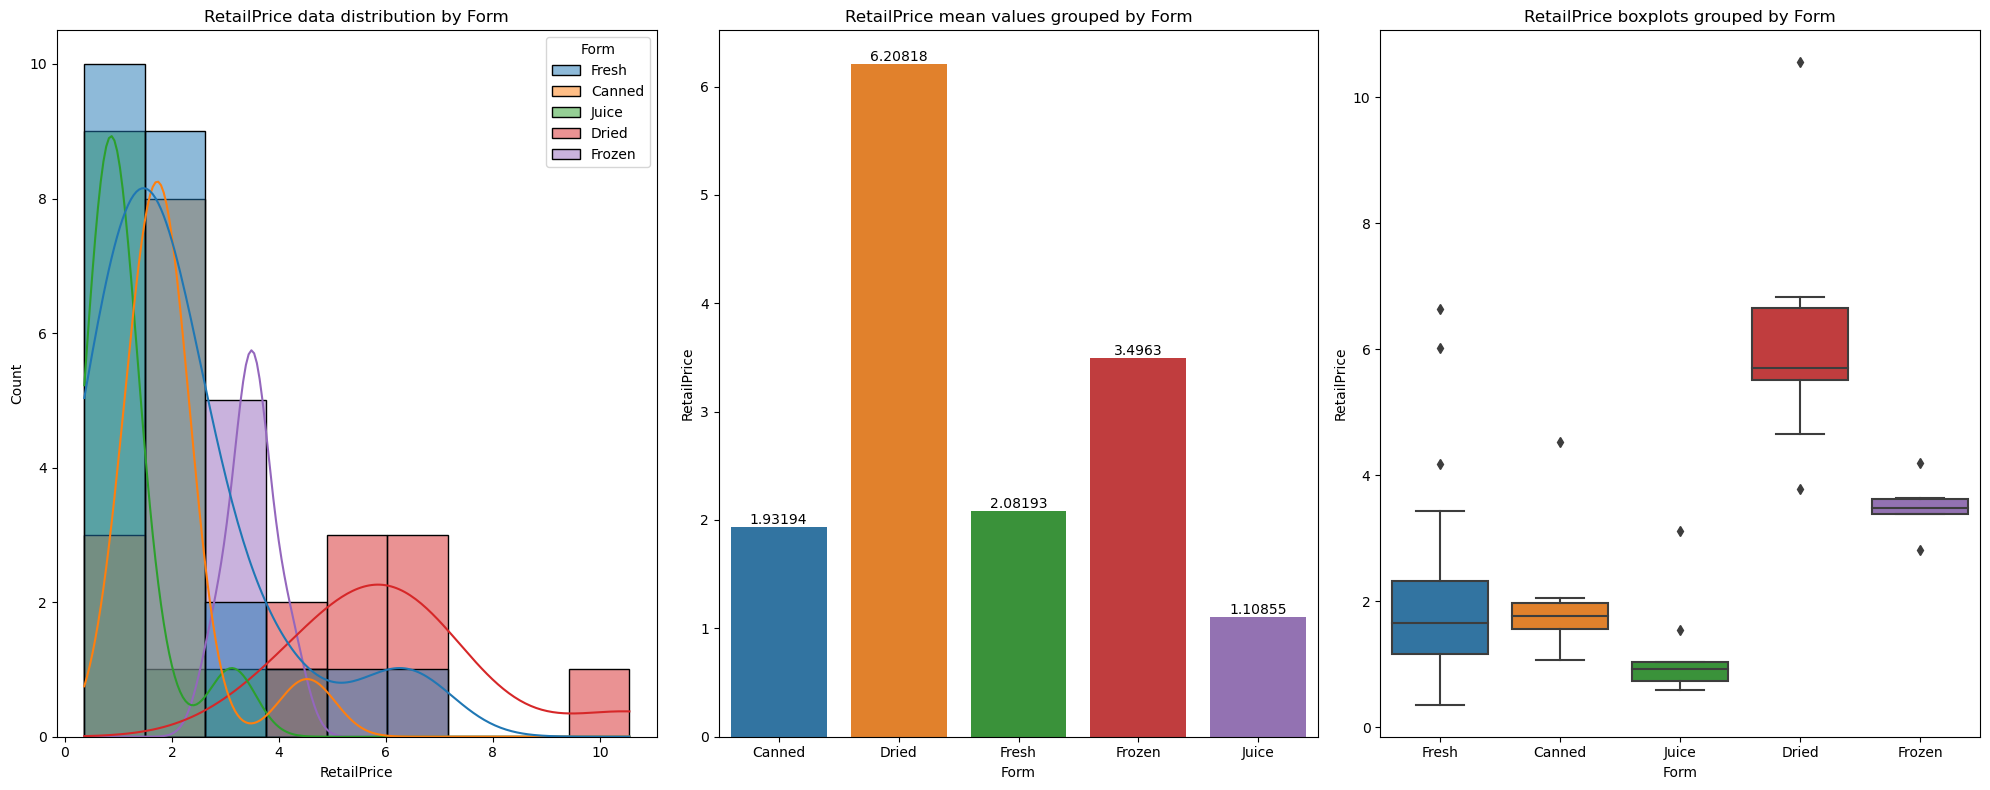

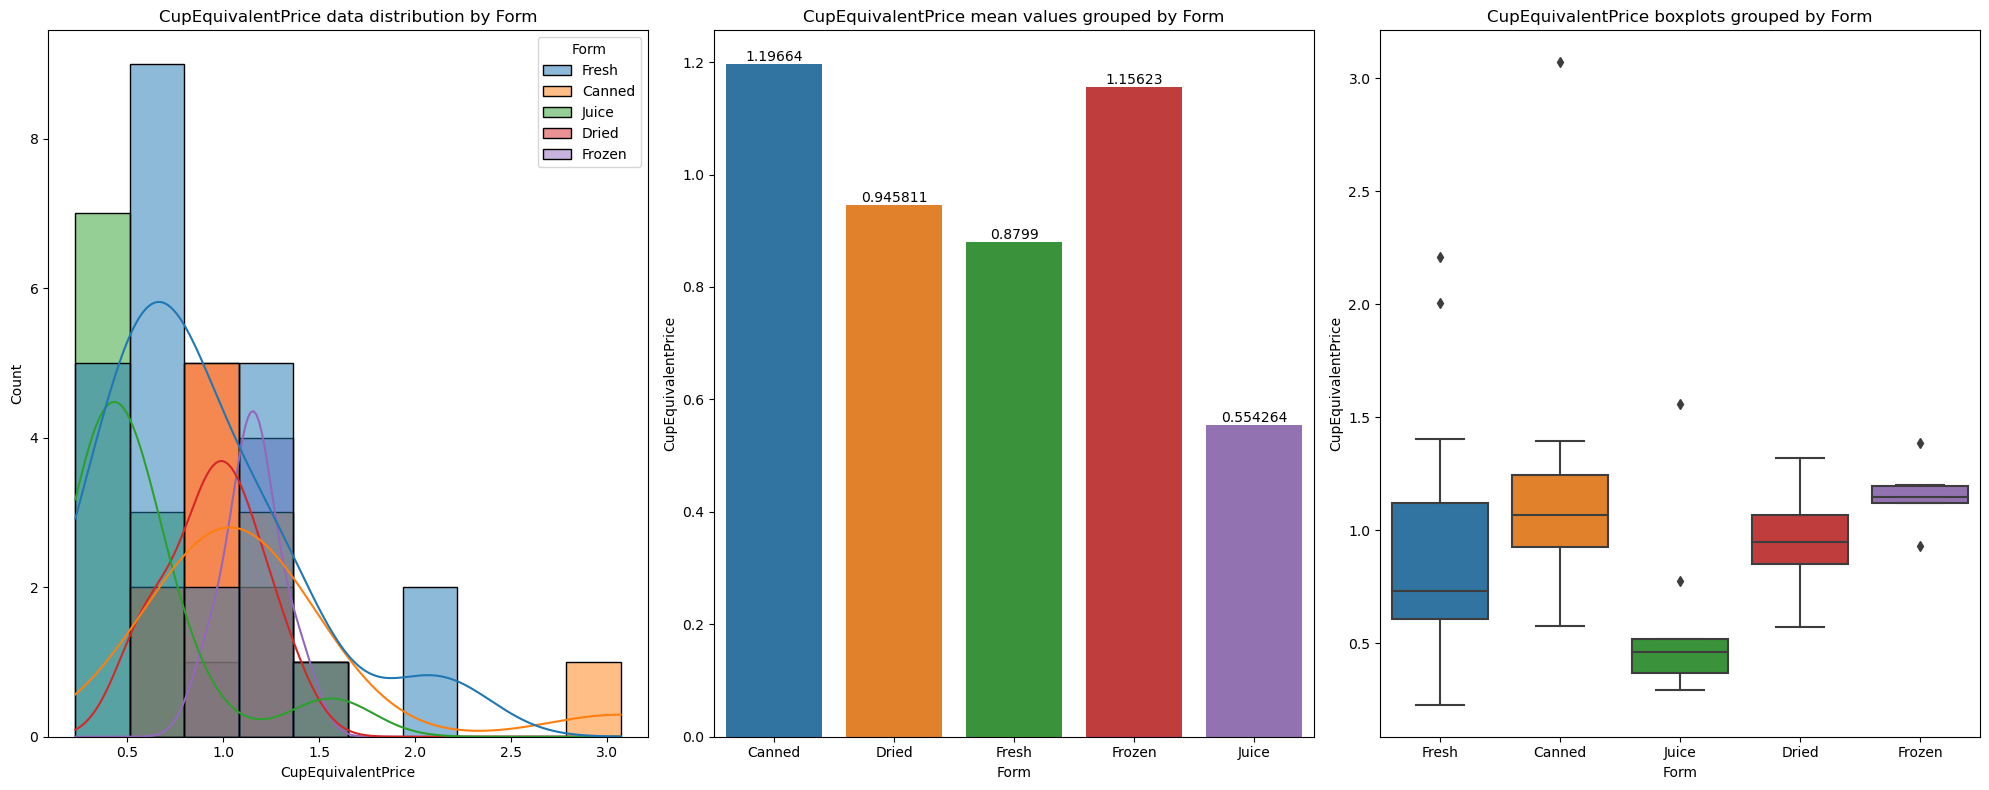

In [14]:
for i in numerical[:2]:
    plots(df, i, 'Form')

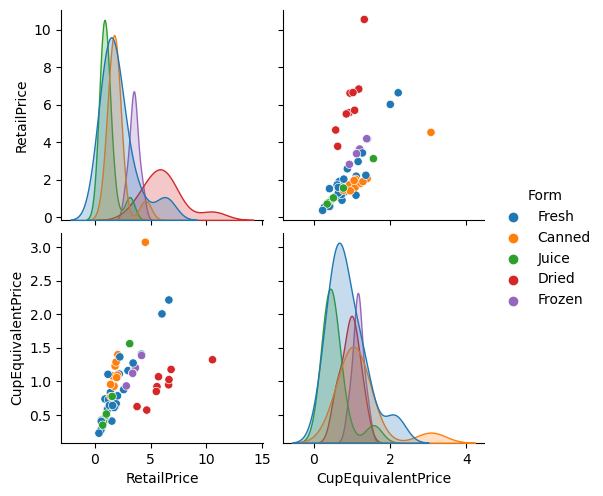

In [15]:
sns.pairplot(df, vars=numerical[:2], hue='Form')